#  **24 September 2025**

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as spc

Given the one dimensional, time-independent Schrodinger Equation given by

$$
\left[ \frac{-\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right] \psi (x)
= E_n \psi (x)
$$

where we note that the entire left hand sign is simply the Hamiltonian operator, with its kinetic and potential components, respectively. Its operation (matrix) form is given by

$$\vec{\Bbb{H}}\vec{\psi} \ = E_n \vec{\psi}$$

The latter equation is solved as an eigenvalue equation, where I is the identity matrix:

$$\left(\vec{\Bbb{H}} - E_n\vec{\Bbb{I}}\right)\vec{\psi} \ =  0$$

We are also reminded of the formula for the second derivative of a function:

$$\psi^{\prime\prime}(x_n) = \frac{\psi(x_{n+1})-2\psi(x_n)+\psi(x_{n-1})}{(\Delta x)^2}$$

We then aim to do the following:
- [ ] Write a function that outputs the Hamiltonian matrix `ham(x_pos, potential_array)` where `x_pos` is an $N \times 1$ array and `pot_array` is an $N \times 1$ array. The function should return a $N \times N$ matrix.

In [14]:
def ham(x_pos, pot_array, var_hbar = spc.hbar, mass = 1):
    '''     ARGUMENTS
        x_pos: values of the position space.
        pot_array: potential values at each position in x_pos.

            OUTPUT
        ham_matrix: an N x N matrix of the hamiltonian.
    '''

    N = len(x_pos)
    dx = x_pos[1] - x_pos[0]            #   width between values, assuming it is constant.
    pot = np.diag(pot_array)            #   puts all values of the potential vector to the principal diagonal of a matrix.
    kin_c = -(var_hbar)/2*mass          #   We aim to normalize such that hbar = 1 and m = 1.
    kin = kin_c* (np.eye(N, N, k=+1) -2*np.eye(N,N, k=0) + np.eye(N,N, k=-1))/(dx**2)
    #-((np.eye(N, N, k=+1) + np.eye(N, N, k=-1) - 2*np.eye(N, N, k=0))/((x_pos[1] - x_pos[0])**2))/2
    ham_matrix = pot + kin
    return ham_matrix



In [74]:
## For example, if my space is from -10<x<10 and my potential is V(x) = 0.5*(x^2):
N = 100
omega = 0.9
x_pos = np.linspace(-10, 10, N)
harmonic_pot = 0.5*(omega**2)*(x_pos**2)

harmonic_setup = ham(x_pos, harmonic_pot, 1)
## where the matrix effectively depends on the potential I want to use

ho_eigvals, ho_eigvecs = np.linalg.eigh(harmonic_setup)

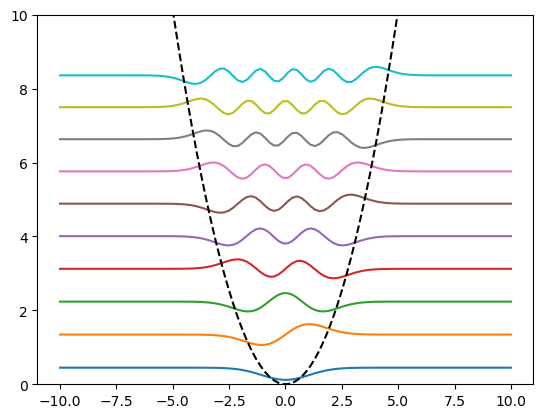

In [75]:
for i in range(10):
    plt.plot(x_pos, ho_eigvals[i] + ho_eigvecs[:, i])

plt.plot(x_pos, harmonic_pot, "k--")
plt.ylim(0,10)
plt.show()

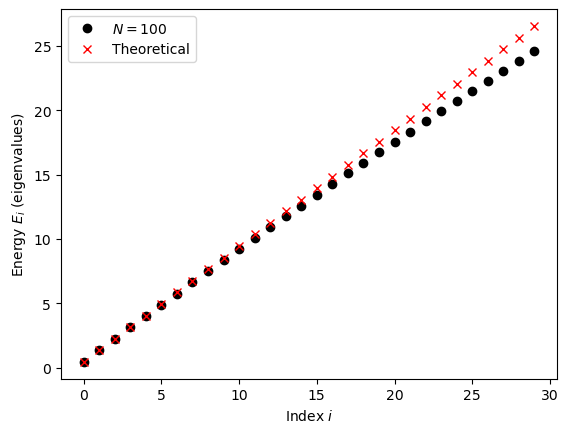

In [76]:
plt.plot(ho_eigvals[:30], "ko", label = "$N = 100$")
plt.plot(omega*(np.arange(30) + 0.5), "rx", label="Theoretical")
plt.xlabel(r"Index $i$")
plt.ylabel(r"Energy $E_i$ (eigenvalues)")
plt.legend()
plt.show()

##  Exercise

For both the (a) harmonic oscillator and (b) finite well potentials, plot the first 30 eigenvalues (after sorting) when discretizing the space for `N = 50, 100, 150, 200, ...` 

The plot should show:
1. How the eigenvalues (eigenenergies) increase linearly or quadratically, and
2. How accurate are the results based on how discretized the space is.

It is up to you to pick the parameters of the two potential, as long as they can show the two points above.

Expected theoretical values:

- Harmonic Oscillator

$$E_n = \hbar\omega\left( n+\frac{1}{2} \right)$$

- Finite Well

$$E_n = \frac{\hbar}{2m}\frac{\pi^2}{L^2}n^2$$

### Harmonic Oscillator.

Recall that $$V(x) = \frac{1}{2}\omega^2x^2$$ where $\omega$ is constant.

In [141]:
#   reso becomes the number of elements (arrays) in each list
reso = 10
N_mat = 50*np.linspace(1, reso, reso)
omega = 1
x_pos = [np.linspace(-10, 10, np.int32(i)) for i in N_mat]

harmonic_pot = [0.5*(omega**2)*(i**2) for i in x_pos]
finwell_pot = [np.zeros(np.int32(i)) for i in N_mat]

harmonic_setup_2 = [ham(x_pos[i], harmonic_pot[i], 1) for i in range(len(x_pos))]
finwell_setup = [ham(x_pos[i], finwell_pot[i], 1) for i in range(len(x_pos))]

ho_eigvals = [np.linalg.eigh(harmonic_setup_2[i])[0] for i in range(reso)]
ho_eigvecs = [np.linalg.eigh(harmonic_setup_2[i])[1] for i in range(reso)]

fw_eigvals = [np.linalg.eigh(finwell_setup[i])[0] for i in range(reso)]
fw_eigvecs = [np.linalg.eigh(finwell_setup[i])[1] for i in range(reso)]

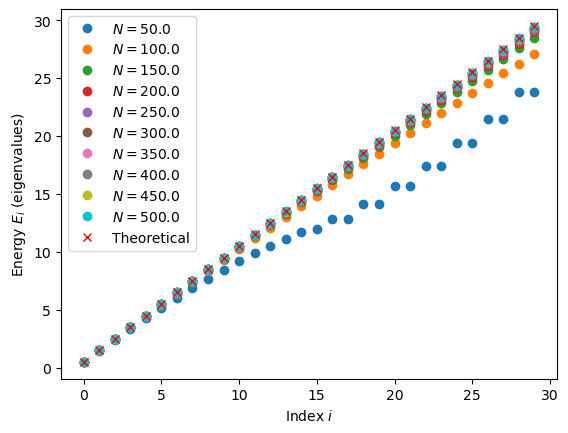

In [113]:
for i in range(len(N_mat)):
    plt.plot(ho_eigvals[i][:30], "o", label = f'$N = {N_mat[i]}$')


plt.plot(omega*(np.arange(30) + 0.5), "rx", label="Theoretical")
plt.xlabel(r"Index $i$")
plt.ylabel(r"Energy $E_i$ (eigenvalues)")
plt.legend()
plt.show()

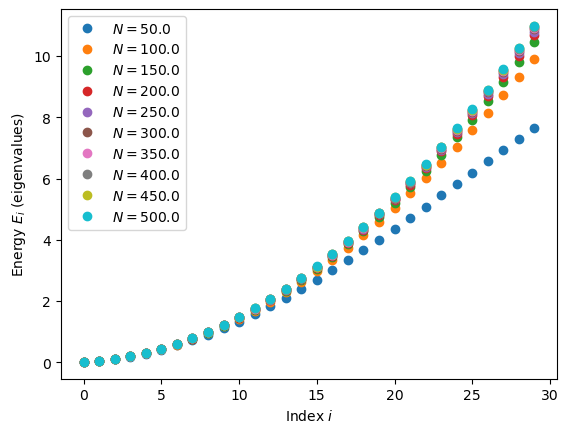

In [146]:
for i in range(len(N_mat)):
    plt.plot(fw_eigvals[i][:30], "o", label = f'$N = {N_mat[i]}$')
    pass

#expect = 0.5*(np.pi**2)*np.arange(30)**2
#plt.plot(expect, "rx", label="Theoretical")
plt.xlabel(r"Index $i$")
plt.ylabel(r"Energy $E_i$ (eigenvalues)")
plt.legend()
plt.show()

##  Activity - Output.

Consider the double-well problem. 
- Enumerate the parameters involved (potential depth, width, distance between wells, etc.) then compute for its eigenenergies. 
- Vary the parameters invoved, then plot their corresponding eigenenergies. Is it consistent with what you do in Physics 141?

We recall the double *square* well potential to have the following potential function, for any length of the entire well $L$:

$$
V(x) =
\begin{cases}
    \infty & \quad x \lt -\frac{1}{2}L \ \cup \ x \gt \frac{1}{2}L  \\
    0 & \quad x \in [-\frac{1}{2}L, -x_a) \ \cup \ x \in (+x_a, +\frac{1}{2}L] \\
    V_0 & \quad x \in [-x_a, +x_a]
\end{cases}
$$

In [ ]:
#   We have to initialize the width of the entire well, L.
L = 10
N = 250
x_a = np.int32(0.5*L)
V_0 = 100

x_pos = np.linspace(-L, L, N)
V_mat = np.zeros(len(x_pos))
x_pos[0]
for i in range(len(x_pos)):
    if (x_pos[i] < -x_a) or (x_pos[i] > x_a):
        V_mat[i] = 0
    else: V_mat[i] = V_0

dfw